In [1]:
import json
import requests
import citipy
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

api_key = "d3e324f57e32b7cf1ca934b35055e7af"
weather_url = "https://api.openweathermap.org/data/2.5/weather?appid=" + api_key +"&units=imperial"

In [2]:
cities_list = pd.read_csv("worldcities.csv")
cities_sample = cities_list.sample(500)

#lat, lng
#temp in F ['main']['temp'] 
#humidity(%) ['main']['humidity'] 
#cloudiness(%),  ['clouds']['all']
#wind speed(mph) ['wind']['speed']
#cities_sample['Temperature (F)'], cities_sample['Humidity (%)'], cities_sample['Cloudiness (%)'], cities_sample['Wind Speed (mph)'] = "", "", "", ""
cities_sample.head()

,Country,City,Latitude,Longitude
11663,fr,hautmont,50.247704,3.924607
11875,fr,nevers,46.991203,3.157084
43180,us,payette,44.078333,-116.932778
34594,ro,urechesti,46.133333,27.083333
722,at,scharnstein,47.900000,13.950000


In [3]:
for index, row in cities_sample.iterrows():
    city = row['City'].title()
    country = row['Country'].upper()
    results = requests.get(weather_url + "&q=" + city + "," + country).json()
    #print(f"Getting Weather Info from {city.title()} {index}, {country.upper()}.")
    
    try:
        cities_sample.loc[index, 'City'] = city
        cities_sample.loc[index, 'Country'] = country
        cities_sample.loc[index, 'Temperature (F)'] = results['main']['temp']
        cities_sample.loc[index, 'Humidity (%)'] = results['main']['humidity']
        cities_sample.loc[index, 'Cloudiness (%)'] = results['clouds']['all']
        cities_sample.loc[index, 'Wind Speed (mph)'] = results['wind']['speed']
    except:
        print(f"No Weather Info for {city} {index}, {country}")

No Weather Info for Krionerion 13822, GR
No Weather Info for Dumitresti 32994, RO
No Weather Info for Cantil 27805, PH
No Weather Info for Ebano 23745, MX
No Weather Info for Poliyiros 14158, GR
No Weather Info for Moskovskiy 40372, TJ
No Weather Info for Ayat 35238, RU
No Weather Info for Filiron 13559, GR
No Weather Info for Forset 25840, NO
No Weather Info for Kisogawa 21487, JP
No Weather Info for Zanatepec 24927, MX
No Weather Info for Strendur 11322, FO
No Weather Info for Maqrin 40439, TN
No Weather Info for Mabuttal 28809, PH
No Weather Info for Tabarqah 40464, TN
No Weather Info for Toplita 34515, RO
No Weather Info for Samusu 46498, WS
No Weather Info for Strazica 2068, BG
No Weather Info for Tunghsiao 40840, TW
No Weather Info for Antimakhia 13402, GR
No Weather Info for Megala Kalivia 13903, GR
No Weather Info for Minien 29144, PH
No Weather Info for Budhgaon 17337, IN
No Weather Info for Whithorn 13045, GB
No Weather Info for Stipsi 14275, GR
No Weather Info for Zozutla 24

In [4]:
cities_sample = cities_sample.dropna()

Using this plot, we can see that the closer you get towards the Equator, it gets hotter


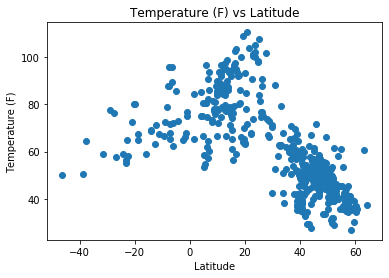

In [5]:
#Temperature vs Latitude Scatter
plt.scatter(cities_sample['Latitude'], cities_sample['Temperature (F)'])
plt.xlabel('Latitude'), plt.ylabel('Temperature (F)'), plt.title('Temperature (F) vs Latitude')
print("Using this plot, we can see that the closer you get towards the Equator, it gets hotter")
plt.savefig('Images/TempLatScatter.png')

Using this plot, we can see that the closer you get towards the Equator, it gets less humid.


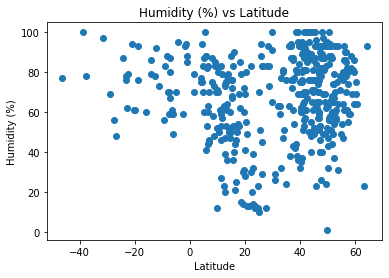

In [6]:
#Humidity (%) vs. Latitude scatter
plt.scatter(cities_sample['Latitude'], cities_sample['Humidity (%)'])
plt.xlabel('Latitude'), plt.ylabel('Humidity (%)'), plt.title("Humidity (%) vs Latitude")
print("Using this plot, we can see that the closer you get towards the Equator, it gets less humid.")
plt.savefig("Images/HumidLatScatter.png")

Using this plot, there does not seem to be a relationship between cloudiness and latitude.


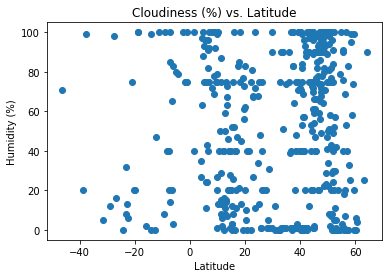

In [7]:
#Cloudiness (%) vs. Latitude Scatter
plt.scatter(cities_sample['Latitude'], cities_sample['Cloudiness (%)'])
plt.xlabel('Latitude'), plt.ylabel('Humidity (%)'), plt.title('Cloudiness (%) vs. Latitude')
print("Using this plot, there does not seem to be a relationship between cloudiness and latitude.")
plt.savefig("Images/CloudLatScatter.png")

Using this plot, we can see that the closer you get towards the Equator, wind speeds get lower.


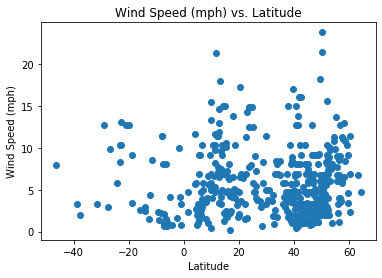

In [8]:
#Wind Speed (mph) vs. Latitude Scatter
plt.scatter(cities_sample['Latitude'], cities_sample['Wind Speed (mph)'])
plt.xlabel('Latitude'), plt.ylabel('Wind Speed (mph)'), plt.title('Wind Speed (mph) vs. Latitude')
print("Using this plot, we can see that the closer you get towards the Equator, wind speeds get lower.")
plt.savefig("Images/WindLatScatter.png")

In [9]:
#define linear regression function
north_hemi = cities_sample.loc[cities_sample['Latitude'] >= 0 ]
south_hemi = cities_sample.loc[cities_sample['Latitude'] < 0]

def linear_plot(x, y, x_label, y_label, title_name):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    line_regress = x * slope + intercept
    plt.scatter(x, y)
    plt.plot(x, line_regress, "r-")
    plt.xlabel(x_label), plt.ylabel(y_label), plt.title(title_name)

north_hemi.info()
south_hemi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 11663 to 43525
Data columns (total 8 columns):
Country             422 non-null object
City                422 non-null object
Latitude            422 non-null float64
Longitude           422 non-null float64
Temperature (F)     422 non-null float64
Humidity (%)        422 non-null float64
Cloudiness (%)      422 non-null float64
Wind Speed (mph)    422 non-null float64
dtypes: float64(6), object(2)
memory usage: 29.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 26321 to 2989
Data columns (total 8 columns):
Country             43 non-null object
City                43 non-null object
Latitude            43 non-null float64
Longitude           43 non-null float64
Temperature (F)     43 non-null float64
Humidity (%)        43 non-null float64
Cloudiness (%)      43 non-null float64
Wind Speed (mph)    43 non-null float64
dtypes: float64(6), object(2)
memory usage: 3.0+ KB


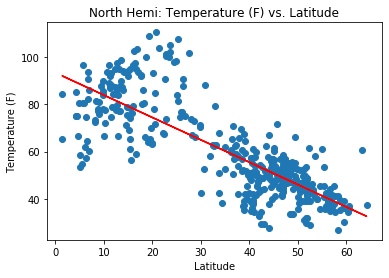

In [10]:
#Northern Hemisphere - Temperature (F) vs. Latitude linear
linear_plot(north_hemi['Latitude'], north_hemi['Temperature (F)'], 'Latitude', 'Temperature (F)', 'North Hemi: Temperature (F) vs. Latitude')


Naturally on both hemispheres, going closer to the equator means higher temperatures.


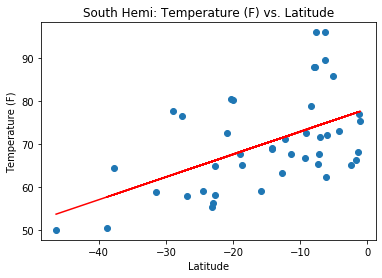

In [11]:
#Southern Hemisphere - Temperature (F) vs. Latitude linear
linear_plot(south_hemi['Latitude'], south_hemi['Temperature (F)'], 'Latitude', 'Temperature (F)', 'South Hemi: Temperature (F) vs. Latitude')

print(f'Naturally on both hemispheres, going closer to the equator means higher temperatures.')

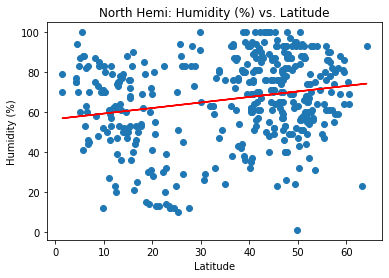

In [12]:
#Northern Hemisphere - Humidity (%) vs. Latitude
linear_plot(north_hemi['Latitude'], north_hemi['Humidity (%)'], 'Latitude', 'Humidity (%)', 'North Hemi: Humidity (%) vs. Latitude')


Humidity in general seems to, on average, slowly increase the more north you get.


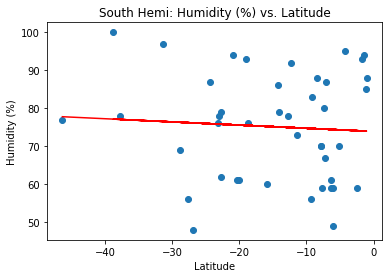

In [13]:
#South Hemi- Humidity (%) vs Latitude
linear_plot(south_hemi['Latitude'], south_hemi['Humidity (%)'], 'Latitude', 'Humidity (%)', 'South Hemi: Humidity (%) vs. Latitude')

print(f'Humidity in general seems to, on average, slowly increase the more north you get.')

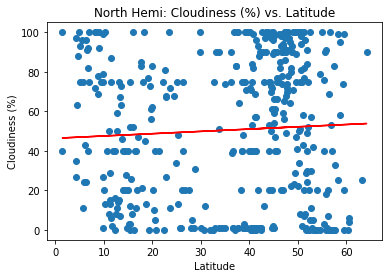

In [14]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
linear_plot(north_hemi['Latitude'], north_hemi['Cloudiness (%)'], 'Latitude', 'Cloudiness (%)', 'North Hemi: Cloudiness (%) vs. Latitude')

While previously there seemed to be no relation, as we go further south, there are lower Cloud percentages.


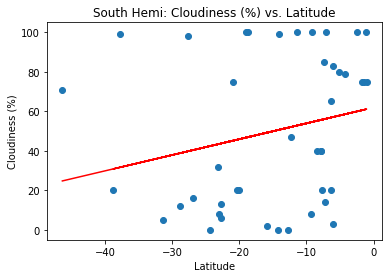

In [15]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
linear_plot(south_hemi['Latitude'], south_hemi['Cloudiness (%)'], 'Latitude', 'Cloudiness (%)', 'South Hemi: Cloudiness (%) vs. Latitude')
print(f'While previously there seemed to be no relation, as we go further south, there are lower Cloud percentages.')

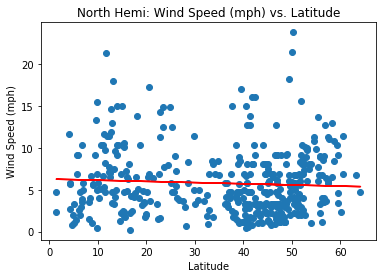

In [16]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
linear_plot(north_hemi['Latitude'], north_hemi['Wind Speed (mph)'], 'Latitude', 'Wind Speed (mph)', 'North Hemi: Wind Speed (mph) vs. Latitude')

Based on these plots, the further south or north you go, the higher wind speeds you will encounter


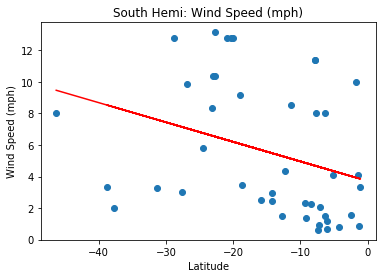

In [17]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
linear_plot(south_hemi['Latitude'], south_hemi['Wind Speed (mph)'], 'Latitude', 'Wind Speed (mph)', 'South Hemi: Wind Speed (mph)')
print(f'Based on these plots, the further south or north you go, the higher wind speeds you will encounter')

In [18]:
cities_sample.to_csv("cities_sample.csv")